In [2]:
import sympy

In [3]:
z = sympy.symbols('z')
a = sympy.symbols('a')
r = sympy.symbols('r')

In [4]:
L, H, v_x, v_y, acc = 60, 20, 5, 2, .5

In [6]:
def get_time(L, H, v_x, v_y, acc):
    t_L = L/v_x + v_x/acc
    t_H = H/v_y + v_y/acc
    t_l = 2*v_x/acc
    t_h = 2*v_y/acc
    return t_L, t_H, t_l, t_h
t_L, t_H, t_l, t_h = get_time(L, H, v_x, v_y, acc)  

In [8]:
print(t_L, t_H, t_l, t_h)

22.0 14.0 20.0 8.0


In [9]:
def t_bx_tl(z, L, H, v_x, v_y, acc): 
    return acc*z**2/(2*L) - acc**4*z**2/(16*L**2)

def t_bx_tL(z, L, H, v_x, v_y, acc): 
    return -v_x**2/(L**2)*z**2+ (2*v_x/L+2*v_x**3/(acc*L**2))*z - 2*v_x**2/(acc*L) - v_x**4/(acc**2*L**2)

def t_by_th(z, L, H, v_x, v_y, acc): 
    return acc*z**2/(2*H) - acc**4*z**2/(16*H**2)

def t_by_tH(z, L, H, v_x, v_y, acc): 
    return -v_y**2/(H**2)*z**2+ (2*v_y/H+2*v_y**3/(acc*H**2))*z - 2*v_y**2/(acc*H) - v_y**4/(acc**2*H**2)  

In [10]:
def B2_1(z, L, H, v_x, v_y, acc): 
    return t_bx_tl(z, L, H, v_x, v_y, acc) * t_by_th(z, L, H, v_x, v_y, acc)

def B2_2(z, L, H, v_x, v_y, acc): 
    return t_bx_tl(z, L, H, v_x, v_y, acc) * t_by_tH(z, L, H, v_x, v_y, acc)

def B2_3(z, L, H, v_x, v_y, acc): 
    return t_bx_tl(z, L, H, v_x, v_y, acc) * 1

def B2_4(z, L, H, v_x, v_y, acc): 
    return t_bx_tL(z, L, H, v_x, v_y, acc) * 1

In [11]:
B2 = [B2_1, B2_2, B2_3, B2_4]

In [12]:
b2 = [sympy.diff(i(z, L, H, v_x, v_y, acc), z) for i in B2]

In [14]:
def get_interval(t_L, t_H, t_l, t_h):
    """
    Get the integrate interval.                     
    """
    if t_l <= t_H and t_H <= t_L:
        interval = [(0, t_h), (t_h, t_l), (t_l, t_H), (t_H, t_L)]
    elif t_h <= t_H and t_H <= t_l:
        interval = [(0, t_h), (t_h, t_H), (t_H, t_l), (t_l, t_L)]
    elif t_L <= t_H:
        interval = [(0, t_h), (t_h, t_l), (t_l, t_L), (t_L, t_H)]
    else: 
        pass
    return interval
interval = get_interval(t_L, t_H, t_l, t_h)

In [15]:
TB_integrate = [sympy.integrate(z*f, (z, interval[ind]))  for ind, f in enumerate(b2)]

In [16]:
TB_integrate

[1.36391138888889, 7.24091385416667, 14.5961979166667, 0.574074074074090]

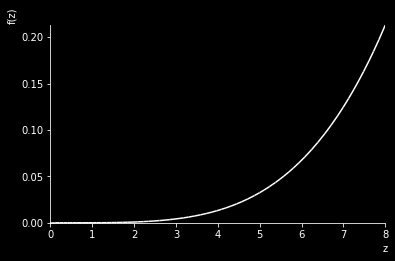

In [17]:
sympy.plot(B2_1(z, L, H, v_x, v_y, acc),(z,0,t_h))

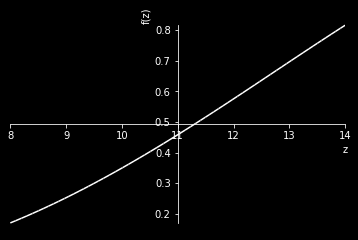

In [18]:
sympy.plot(B2_2(z, L, H, v_x, v_y, acc),(z,t_h,t_H))


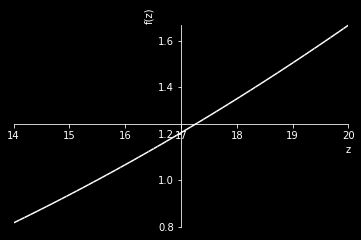

In [19]:
sympy.plot(B2_3(z, L, H, v_x, v_y, acc),(z,t_H,t_l))


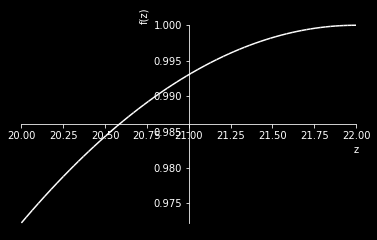

In [20]:
sympy.plot(B2_4(z, L, H, v_x, v_y, acc),(z,t_l,t_L))


In [31]:
print(t_bx_tl(t_l, L, H, v_x, v_y, acc))

0.9722222222222223


In [27]:
def t_bx_tl(z, L, H, v_x, v_y, acc): 
    return acc*z**2/(2*L) - acc**2*z**4/(16*L**2)